In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
df = pd.read_csv('ia.csv')

In [5]:
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [7]:
df.replace("", np.nan, inplace=True)
df.isnull().sum()

,0
post_id,0
upload_date,0
media_type,0
likes,0
comments,0
shares,0
saves,0
reach,0
impressions,0
caption_length,0


In [11]:
# Grouping by content category to see average metrics
category_stats = df.groupby('content_category')[['likes', 'engagement_rate', 'reach']].mean().sort_values(by='engagement_rate', ascending=False)
print("Category Stats:\n", category_stats)

Category Stats:
                           likes  engagement_rate         reach
content_category                                              
Beauty            101651.713512        15.664385  9.975655e+05
Photography       100587.300494        14.816511  9.885627e+05
Lifestyle          99503.017567        14.692105  9.776051e+05
Fashion            99344.997693        14.523533  9.959994e+05
Music              98341.213786        14.488062  9.895162e+05
Comedy             99043.153220        14.396149  1.031709e+06
Food              101236.880399        13.988711  9.946337e+05
Fitness            98857.232024        13.948752  1.007764e+06
Technology        101451.743140        13.927650  9.949564e+05
Travel             99100.074798        13.757692  9.880336e+05


In [12]:
# 3. Statistical Analysis
# Hypothesis Testing: One-way ANOVA to test if media_type affects engagement_rate
media_groups = [group['engagement_rate'].values for name, group in df.groupby('media_type')]
f_val, p_val = stats.f_oneway(*media_groups)
print(f"\nANOVA (Media Type vs Engagement Rate): F={f_val:.2f}, p={p_val:.4f}")


ANOVA (Media Type vs Engagement Rate): F=0.33, p=0.8042


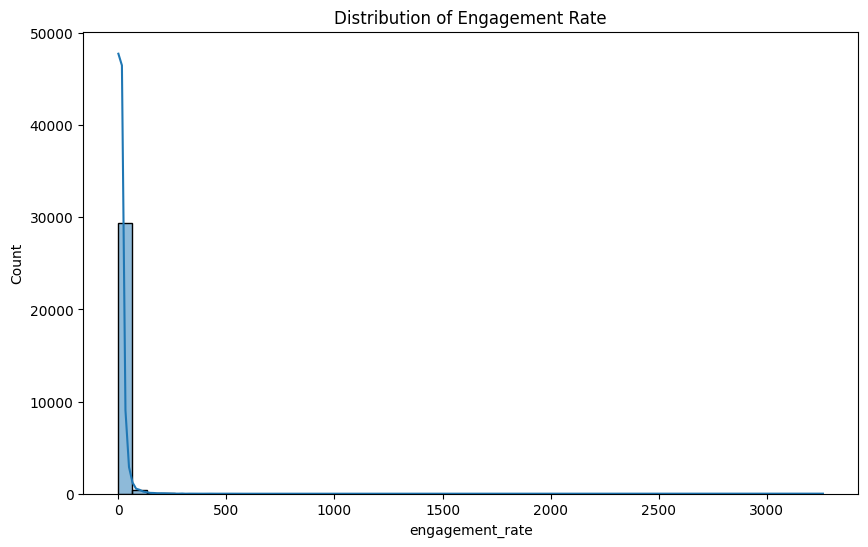

In [13]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_rate'], bins=50, kde=True)
plt.title('Distribution of Engagement Rate')
plt.show()

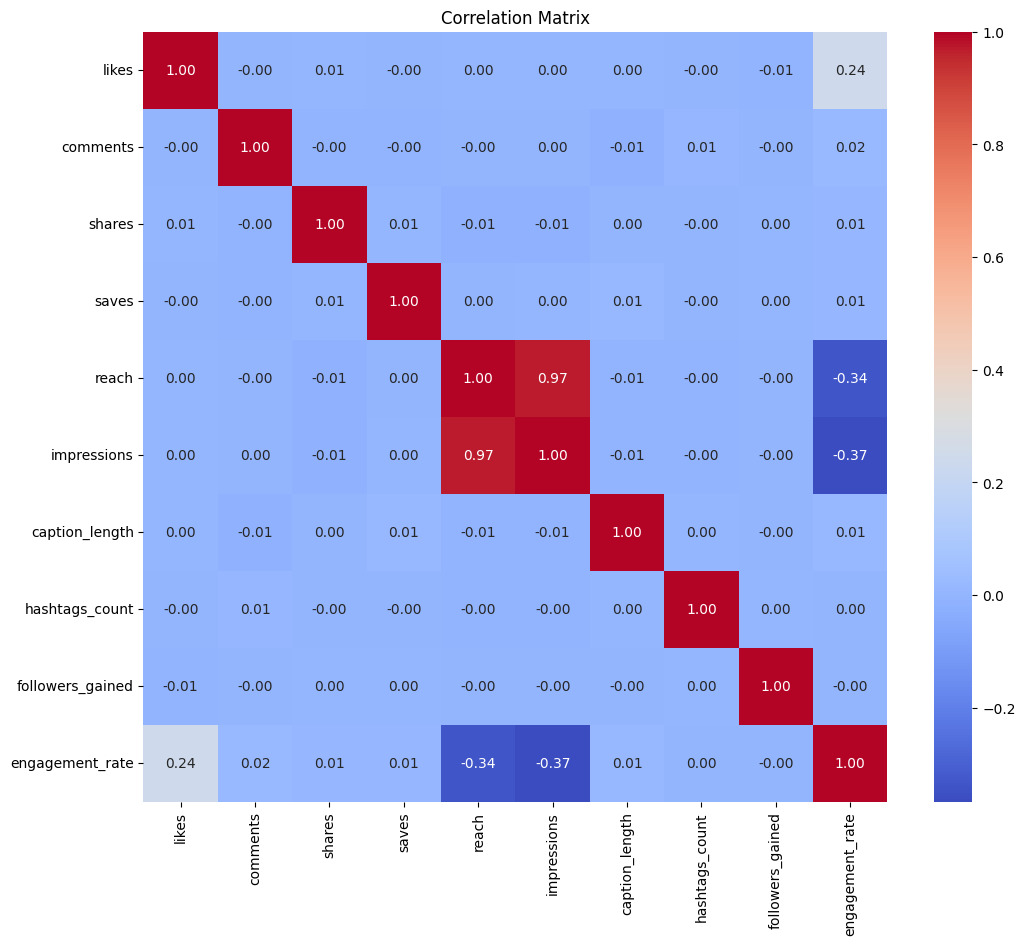

In [17]:
# 5. Linear Algebra (Correlation Matrix)
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Optimal Hashtag Count: 0 (Avg Engagement: 18.61)


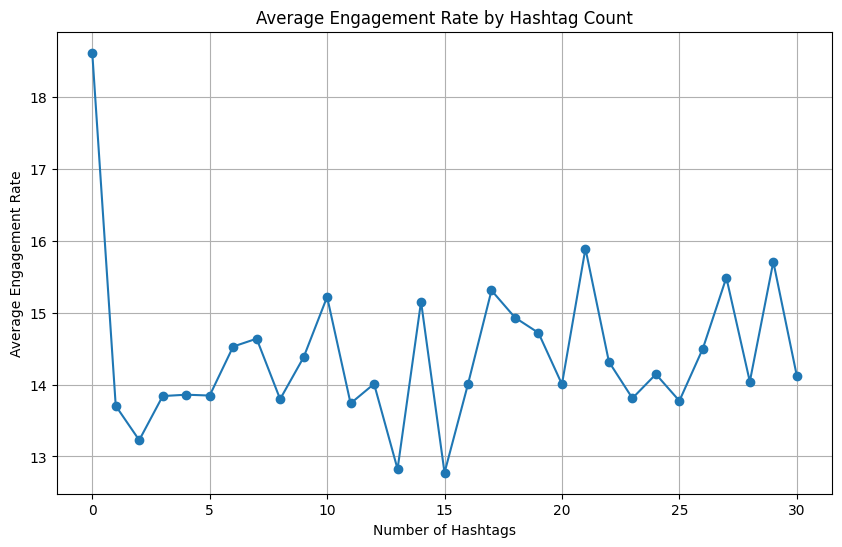

In [18]:
# 6. Optimization Algorithms
# Finding the optimal hashtag count that maximizes engagement
hashtag_engagement = df.groupby('hashtags_count')['engagement_rate'].mean()
optimal_hashtags = hashtag_engagement.idxmax()
max_engagement = hashtag_engagement.max()
print(f"\nOptimal Hashtag Count: {optimal_hashtags} (Avg Engagement: {max_engagement:.2f})")

plt.figure(figsize=(10, 6))
hashtag_engagement.plot(kind='line', marker='o')
plt.title('Average Engagement Rate by Hashtag Count')
plt.xlabel('Number of Hashtags')
plt.ylabel('Average Engagement Rate')
plt.grid(True)
plt.show()

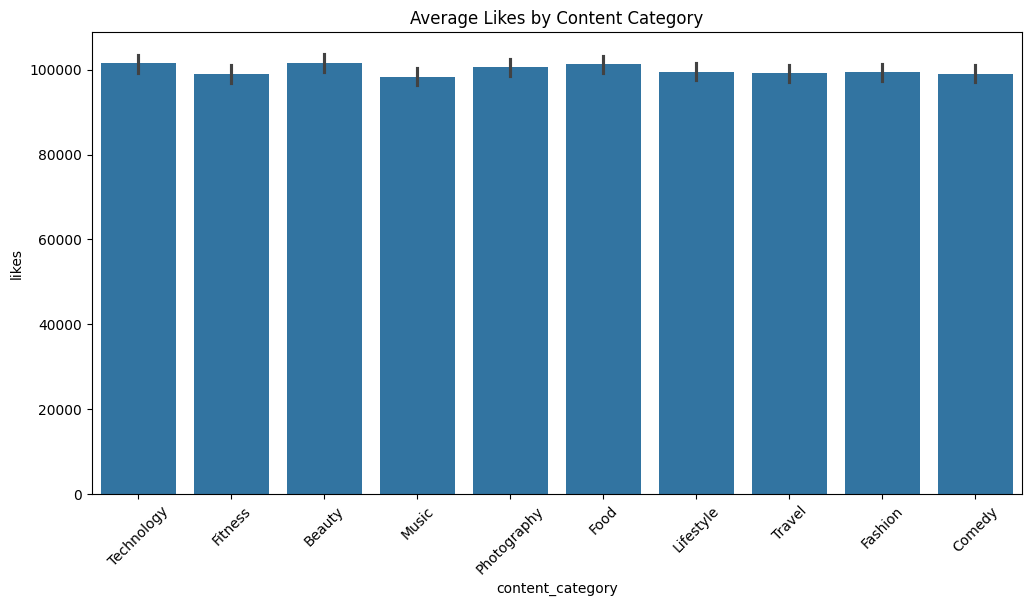

In [19]:
# 7. Visualizations (Bar Charts & Scatter Plots)
# Bar chart: Average likes by category
plt.figure(figsize=(12, 6))
sns.barplot(x='content_category', y='likes', data=df, estimator=np.mean)
plt.title('Average Likes by Content Category')
plt.xticks(rotation=45)
plt.show()

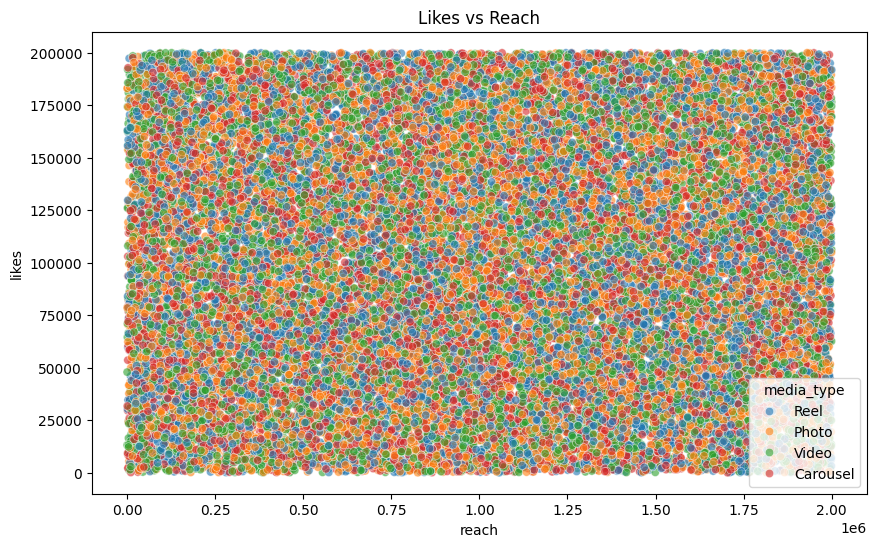

In [20]:
# Scatter Plot: Likes vs Reach
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reach', y='likes', hue='media_type', data=df, alpha=0.6)
plt.title('Likes vs Reach')
plt.show()

In [21]:
# 8. Machine Learning Modeling (Random Forest)
# Prepare features (X) and target (y)
X = df[['likes', 'comments', 'shares', 'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count', 'followers_gained']]
y = df['engagement_rate']

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance (Random Forest):\nMSE: {mse:.2f}\nR2 Score: {r2:.4f}")


Model Performance (Random Forest):
MSE: 1001.03
R2 Score: 0.5949



Feature Importance:
 impressions         0.756286
likes               0.227910
saves               0.005037
caption_length      0.002882
shares              0.002545
comments            0.001806
followers_gained    0.001709
hashtags_count      0.000948
reach               0.000875
dtype: float64


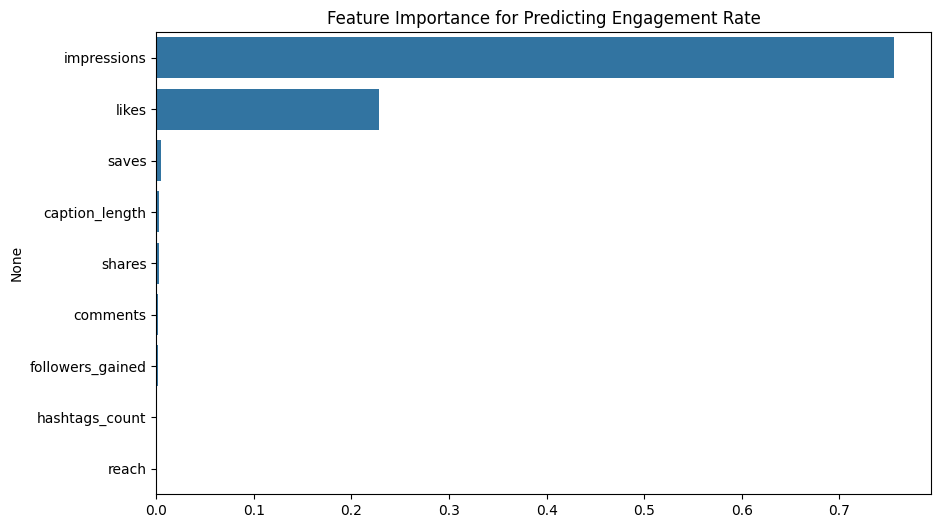

In [24]:
# Feature Importance Analysis
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_imp)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title('Feature Importance for Predicting Engagement Rate')
plt.show()